<a href="https://colab.research.google.com/github/priyasi345/healthcare/blob/master/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:

pyo.init_notebook_mode(connected=True)
cf.go_offline()


In [3]:
heart=pd.read_csv(r'/content/heart.csv')

In [4]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [7]:
heart['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [8]:
heart.groupby('target').size()

target
0    499
1    526
dtype: int64

In [9]:

heart.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,28228,413,241,66919,125395,82,228,69426,274,798.5,582,578,1267
1,27567,300,725,67983,126755,71,315,83416,71,299.8,838,195,1115


In [10]:
heart.shape

(1025, 14)

In [11]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
heart['target'].unique()

array([0, 1])

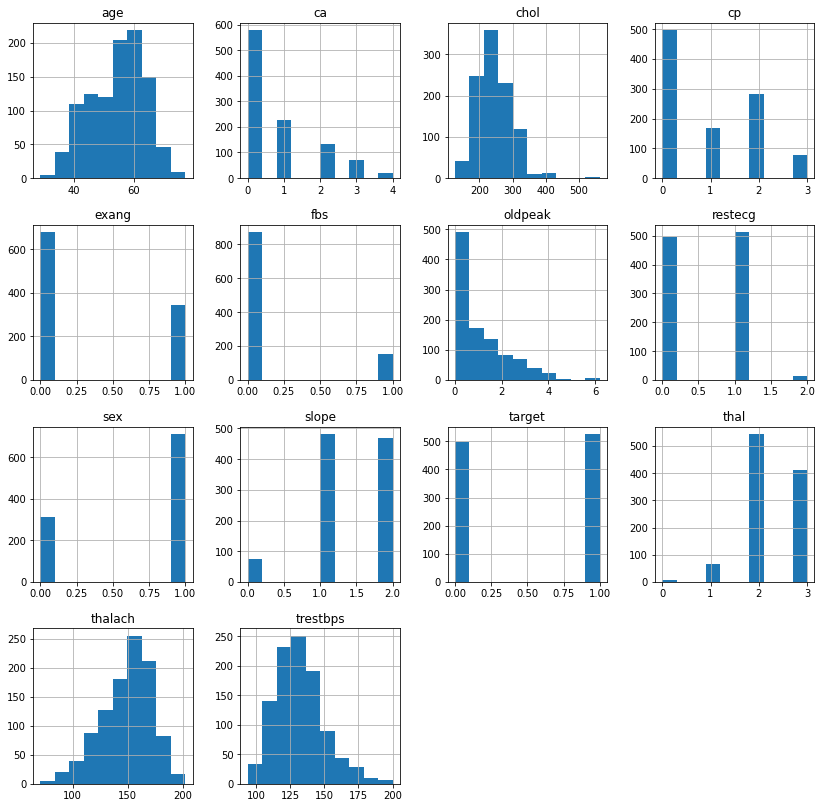

In [14]:

heart.hist(figsize=(14,14))
plt.show()

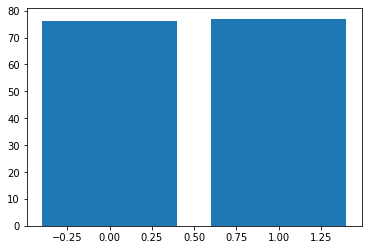

In [15]:
plt.bar(x=heart['sex'],height=heart['age'])
plt.show()

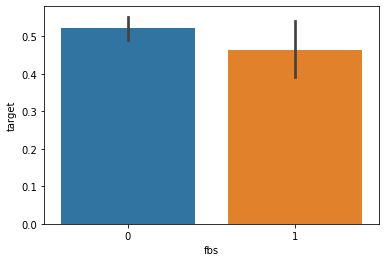

In [16]:
sns.barplot(x="fbs", y="target", data=heart)
plt.show()

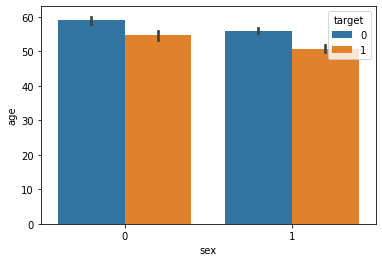

In [17]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])

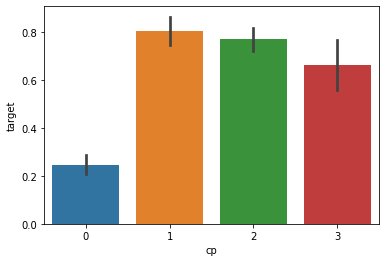

In [18]:

sns.barplot(heart["cp"],heart['target'])

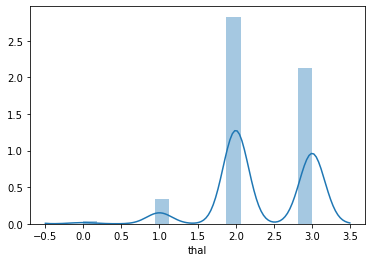

In [19]:
sns.distplot(heart["thal"])

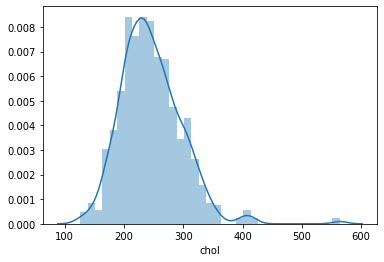

In [20]:
sns.distplot(heart["chol"])

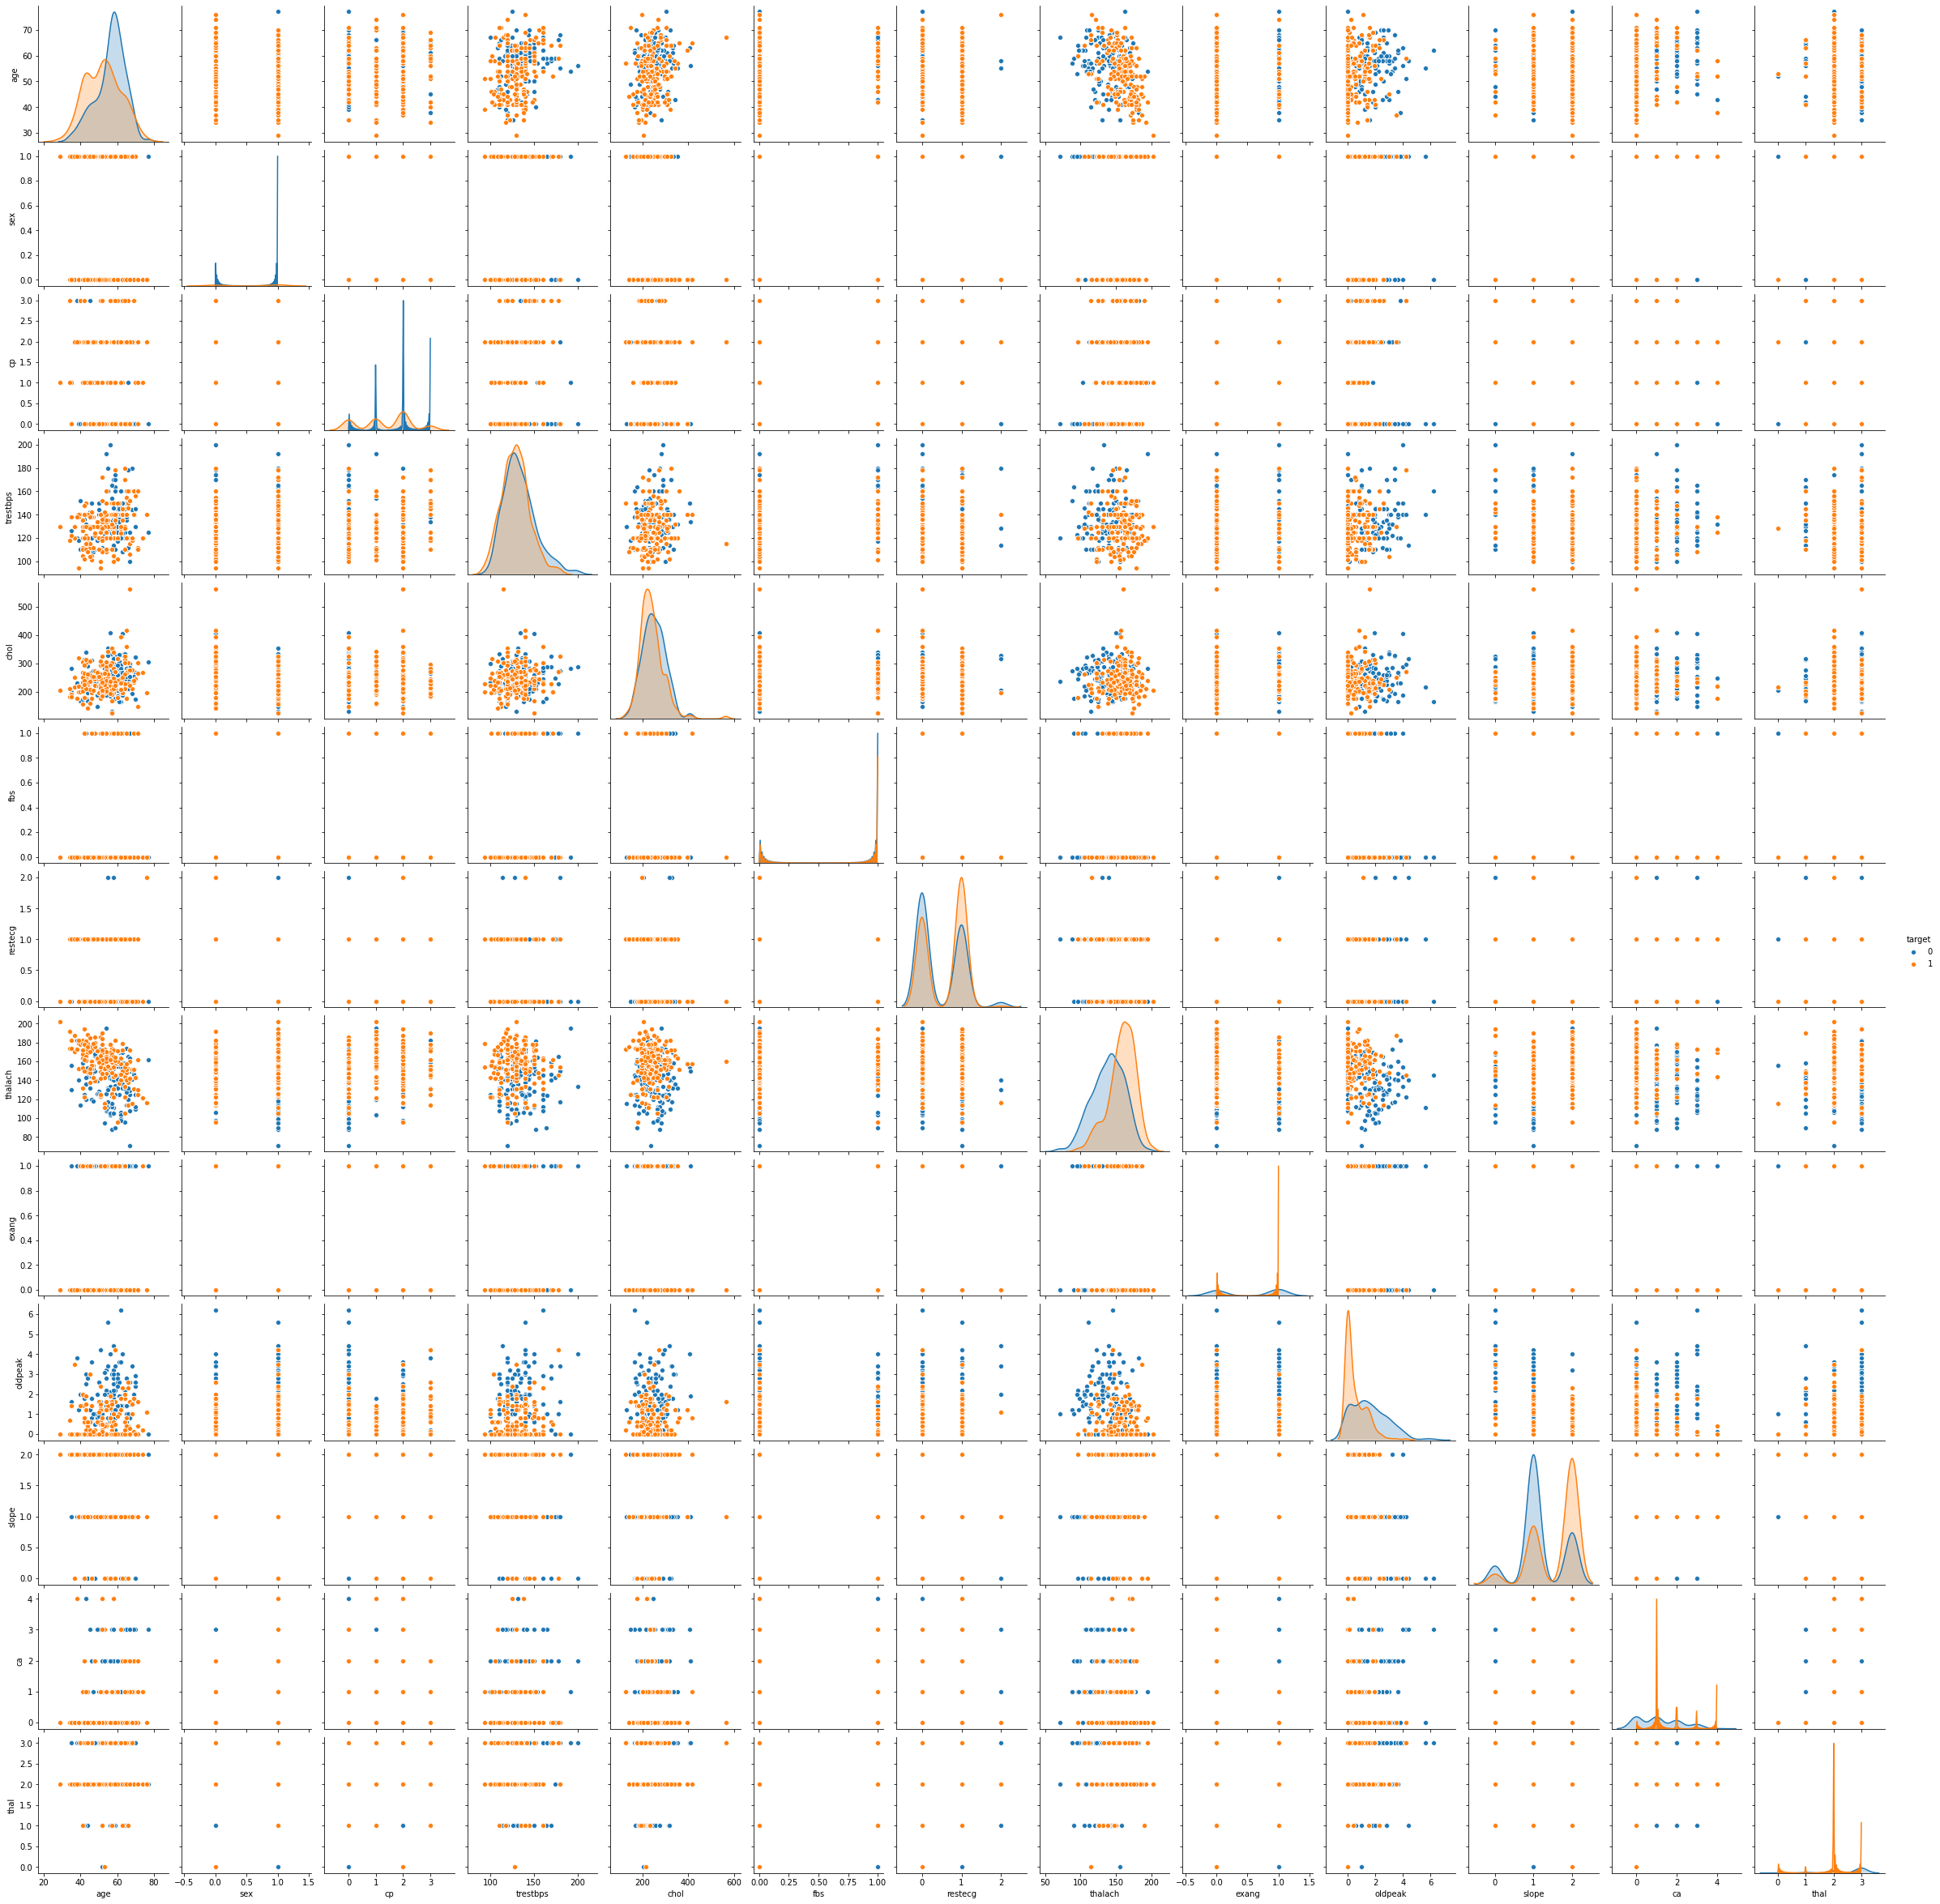

In [21]:
sns.pairplot(heart,hue='target')

In [22]:

numeric_columns=['trestbps','chol','thalach','age','oldpeak']

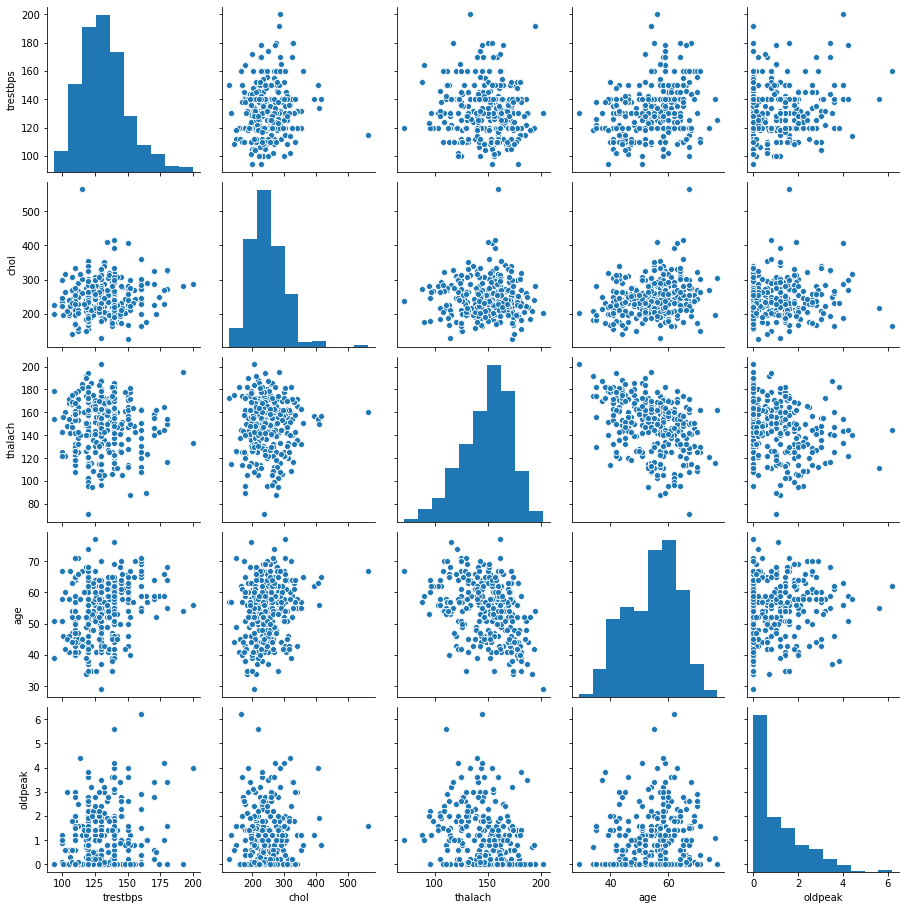

In [23]:
sns.pairplot(heart[numeric_columns])

In [24]:

heart['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

1    526
0    499
Name: target, dtype: int64


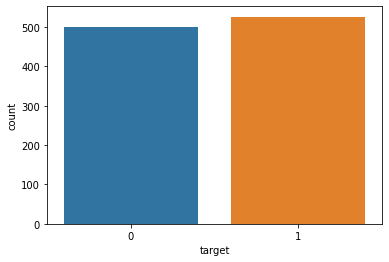

In [25]:

y = heart["target"]

sns.countplot(y)

target_temp = heart.target.value_counts()

print(target_temp)

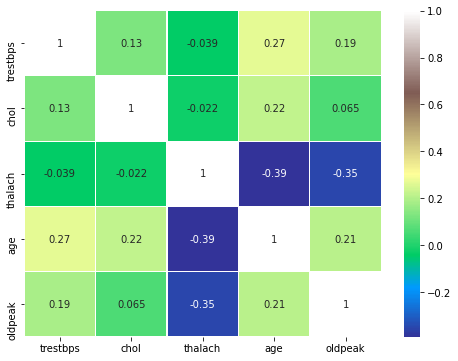

In [26]:
# create a correlation heatmap
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

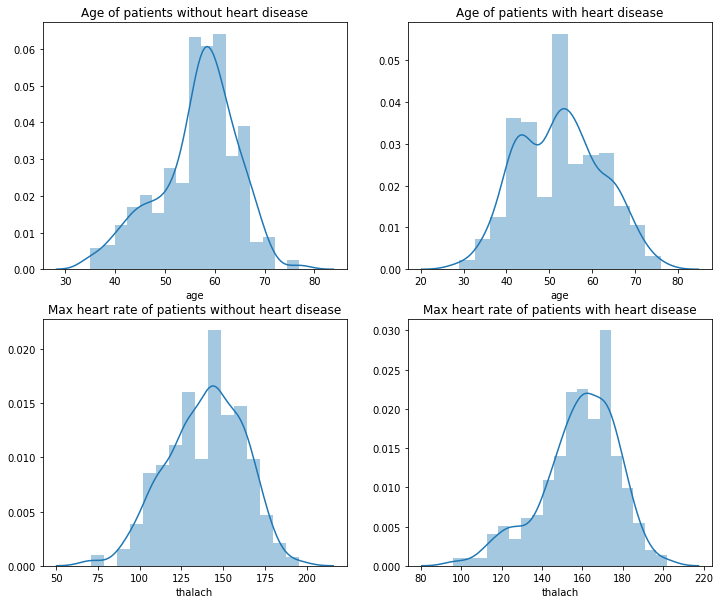

In [27]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

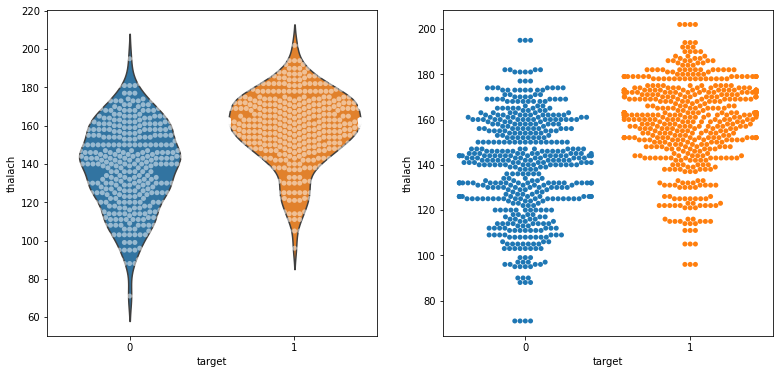

In [28]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=heart, inner=None)
sns.swarmplot(x="target", y="thalach", data=heart, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=heart)
plt.show()

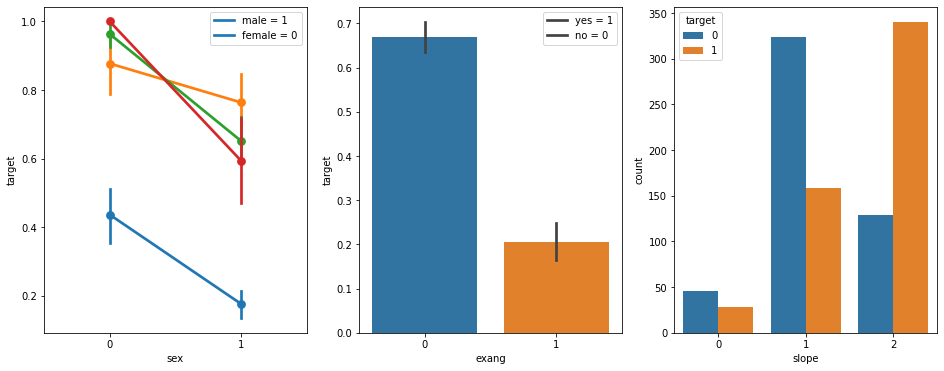

In [29]:

# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart)
plt.show()

In [30]:

#DATA Preprocessing
heart['target'].value_counts()
heart['target'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1020    False
1021    False
1022    False
1023    False
1024    False
Name: target, Length: 1025, dtype: bool

In [31]:
heart['target'].sum()

heart['target'].unique()

heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
#Storing in X and y
X,y=heart.loc[:,:'thal'],heart.loc[:,'target']

In [33]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [34]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [35]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X=heart.drop(['target'],axis=1)

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [38]:

from sklearn.tree import DecisionTreeClassifier


dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [40]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.987


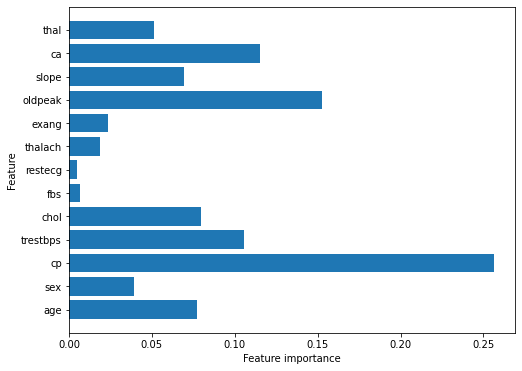

In [41]:

def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

In [44]:
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [45]:
X_test_std

array([[ 0.27431507,  0.67625223, -0.9225805 , ..., -0.61077567,
         0.24307241,  1.10622066],
       [ 1.04562452,  0.67625223,  1.98294024, ..., -0.61077567,
        -0.72516601, -0.50917692],
       [ 1.7067469 ,  0.67625223, -0.9225805 , ..., -0.61077567,
         2.17954925, -0.50917692],
       ...,
       [ 1.26599865,  0.67625223, -0.9225805 , ...,  1.005188  ,
        -0.72516601, -2.12457451],
       [-0.05624612,  0.67625223,  1.01443332, ..., -0.61077567,
        -0.72516601,  1.10622066],
       [ 1.37618571,  0.67625223, -0.9225805 , ..., -0.61077567,
         1.21131083,  1.10622066]])

In [46]:

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [47]:
prediction_knn=knn.predict(X_test_std)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [48]:
accuracy_knn

87.66233766233766

In [49]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.462
Accuracy on test set: 0.367


In [50]:

k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    prediction_knn=knn.predict(X_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [51]:
scores

{1: 0.9512987012987013,
 2: 0.9415584415584416,
 3: 0.9058441558441559,
 4: 0.8766233766233766,
 5: 0.8701298701298701,
 6: 0.8636363636363636,
 7: 0.8474025974025974,
 8: 0.8311688311688312,
 9: 0.8571428571428571,
 10: 0.8474025974025974,
 11: 0.8603896103896104,
 12: 0.8701298701298701,
 13: 0.8733766233766234,
 14: 0.8603896103896104,
 15: 0.8603896103896104,
 16: 0.8409090909090909,
 17: 0.8376623376623377,
 18: 0.8376623376623377,
 19: 0.8246753246753247,
 20: 0.814935064935065,
 21: 0.8214285714285714,
 22: 0.8246753246753247,
 23: 0.8214285714285714,
 24: 0.8181818181818182,
 25: 0.8181818181818182}

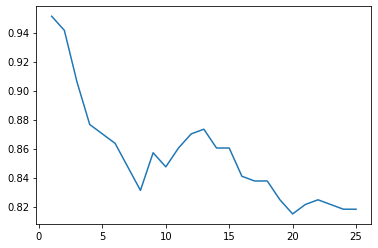

In [52]:
plt.plot(k_range,scores_list)

In [53]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

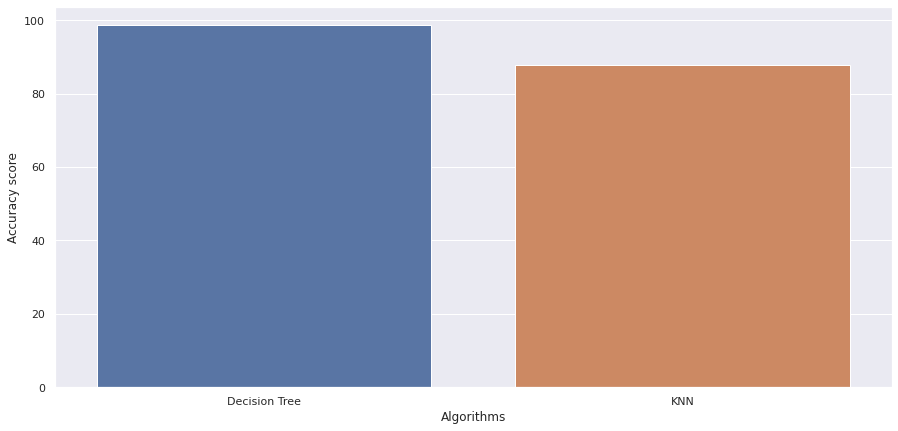

In [54]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)